##### NoteBook Imports and Packages

In [128]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #Color Map
from sympy import symbols,diff
from math import log

%matplotlib inline

#### Example 1 = Simple Cost Function

$f(x) = x^2 + x + 1$

In [ ]:
def f(x):
    return x**2 + x + 1

In [ ]:
# Make Data
X_1 = np.linspace(start=-3,stop=3, num=500)

In [ ]:
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(X_1, f(X_1))
plt.show()

#### Slope and Derivatives

In [ ]:
def df(x):
    return 2*x + 1 

In [ ]:
# Subplot Function Side by Side
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(X_1, f(X_1), color='blue',linewidth=3)

plt.subplot(1,2,2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(X_1,df(X_1), color='skyblue',linewidth=5)
plt.show()

#### Python Loops & Gradient Descent

In [ ]:
# Gradient Descent - 1
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    stepsize = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if stepsize < precision:
        print(n)
        break

print('Occurs at', new_x)
print(df(new_x))
print(f(new_x))

In [ ]:
# Scatter Plot Subplot Function Side by Side
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(X_1, f(X_1), color='blue',linewidth=3)
values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

plt.subplot(1,3,2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(X_1,df(X_1), color='skyblue',linewidth=5, alpha=0.6)
values = np.array(x_list)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)

plt.subplot(1,3,3)

plt.title('Gradient Descent(Close Up)', fontsize=17)
plt.xlim([-0.55,-0.2])
plt.ylim([-0.3,0.8])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.plot(X_1,df(X_1), color='skyblue',linewidth=6, alpha=0.8)
values = np.array(x_list)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)
plt.show()

#### Multiple Minima vs Inital Guess & Advanced Functions

#### $g(x) = x^4-4x^2+5$

In [ ]:
# Make Some Data
X_2 = np.linspace(-2,2,1000)

def g(x):
    return x**4-4*x**2 + 5

def dg(x):
    return 4*x**3-8*x

In [ ]:
# Subplot Function Side by Side
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(X_2, g(X_2), color='blue',linewidth=3)

plt.subplot(1,2,2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(X_2,dg(X_2), color='skyblue',linewidth=5)
plt.show()

#### Gradient Descent as a Python Function

In [ ]:
# Gradient Descent -2

def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.0001, max_iter=300):
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        stepsize = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if stepsize < precision:
            break
    
    return new_x,x_list,slope_list

In [ ]:
local_min,list_x,deriv_list = gradient_descent(derivative_func=dg,initial_guess=0)

# Subplot Function Side by Side
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(X_2, g(X_2), color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)), color='red',s=100,alpha=0.6)
plt.subplot(1,2,2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(X_2,dg(X_2), color='skyblue',linewidth=5)
plt.scatter(list_x,deriv_list, color='red', s=100, alpha=0.6)
plt.show()

#### Example 3 - Divergence Overflow and Python Tuples

#### $h(x) = x^5 - 2x^4 + 2$

In [ ]:
#Make Data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

In [ ]:
local_min,list_x,deriv_list = gradient_descent(derivative_func=dh,initial_guess=-0.2, max_iter=70)

# Subplot Function Side by Side
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-1.2,2.5])
plt.ylim([-1,4])
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_3, h(x_3), color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,h(np.array(list_x)), color='red',s=100,alpha=0.6)
plt.subplot(1,2,2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlim([-1,2])
plt.ylim([-4,5])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.plot(x_3,dh(x_3), color='skyblue',linewidth=5)
plt.scatter(list_x,deriv_list, color='red', s=100, alpha=0.6)
plt.show()

print('Local Min occurs at: ', local_min)
print('Cost at this Minimum is: ', h(local_min))
print('Number of Steps: ', len(list_x))

In [ ]:
import sys
sys.version
type(h(local_min))
sys.float_info.max

#### Python Tuples

In [ ]:
# Creating a Tuple - Tuple Packing
# Example
breakfast = 'bacon', 'eggs', 'avacado'
unlucky_numbers = 13, 4, 9, 26, 17

# Accessing Tuples
print('I Love', breakfast[0])

# Differentiating Factor of Tuples - Having Hetrogenous Data
not_my = 1, 'two', 3, 'Four'

# Tuple with Single Value
one_value = 1,
type(one_value)

# Sequence Packing
main, side, greens = breakfast
print(main)

# Gradient Descent Tuple
data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print(data_tuple[0])

#### The Learning Rate

In [ ]:
local_min,list_x,deriv_list = gradient_descent(derivative_func=dg,initial_guess=1.9,multiplier=0.02, max_iter=500)

# Subplot Function Side by Side
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=17)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(X_2, g(X_2), color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)), color='red',s=100,alpha=0.6)

plt.subplot(1,2,2)
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(X_2,dg(X_2), color='skyblue',linewidth=5)
plt.scatter(list_x,deriv_list, color='red', s=100, alpha=0.6)
plt.show()

print('Number of Steps', len(list_x))


In [ ]:
# Run Gradient Descent 3 Times
n = 100
# Gamma is often used for Learning Rate
low_gamma = gradient_descent(derivative_func=dg,initial_guess=3,multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg,initial_guess=3,multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg,initial_guess=3,multiplier=0.002, precision=0.0001, max_iter=n)

# Experiments
insane_gamma = gradient_descent(derivative_func=dg,initial_guess=1.9,multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting Reduction in Cost for Each iteration
plt.figure(figsize=[20,10])

plt.title('Effect of Learning Rate', fontsize=17)
plt.xlim([0,n])
plt.ylim([0,50])
plt.xlabel('No of Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our Chart
# 1) Y Axis Data: Convert List to Numpy Arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
insane_values = np.array(insane_gamma[1])

# 2) X Axis Data: Create List from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting Low Learning Rate
plt.plot(iteration_list, g(low_values), color='lightgreen',linewidth=5)
plt.scatter(iteration_list,g(low_values), color='lightgreen',s=80)

# # Plotting Mid Learning Rate
plt.plot(iteration_list, g(mid_values), color='red',linewidth=5)
plt.scatter(iteration_list,g(mid_values), color='red',s=80)

# Plotting High Learning Rate
plt.plot(iteration_list, g(high_values), color='steelblue',linewidth=5)
plt.scatter(iteration_list,g(high_values), color='steelblue',s=80)

# Plotting Experiment Learning Rate
plt.plot(iteration_list, g(insane_values), color='pink',linewidth=5)
plt.scatter(iteration_list,g(insane_values), color='pink',s=80)


plt.show()

#### Example 4 - Data Visualisation with 3D Charts

#### Minmise $f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$

#### Splitting Minimise $f(x,y) = \frac{1}{r + 1}$ where $r$ is $3^{-x^2 - y^2}$ 

In [ ]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1/(r + 1)

In [95]:
# Make Data
x_4 = np.linspace(start = -2 , stop = 2, num = 200)
y_4 = np.linspace(start = -2 , stop = 2, num = 200)
print(x_4.shape)
x_4, y_4 = np.meshgrid(x_4, y_4)
print(x_4.shape)

(200,)
(200, 200)


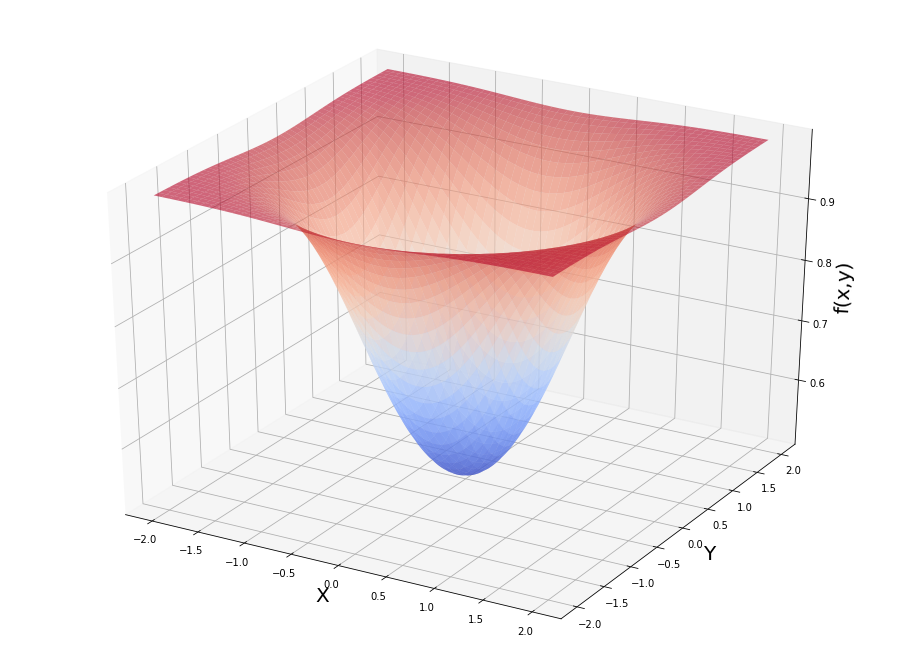

In [110]:
# Generating 3D Plot

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection = '3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y)', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.6)
plt.show()

For Calculating Slope of above 3d Function we Have to Use Partial Derivatives 
We will use Symbolic Computation in Python

#### Partial Derivatives and Symbolic Computation
#### Using SymPy

### Function $\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$

### Function $\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$

In [123]:
a,b = symbols('x , y')
print('Our Cost Function is',f(a, b))

f(a,b)

print('Partial Derivative Function is ',diff(f(a,b), a))
diff(f(a,b), a)
print('Value of F(x,y) at x=1.8 and y=1',f(a,b).evalf(subs={a: 1.8, b: 1.0})) # This type of Function is Python Dictionary
print('Value of Partial Derivative of f(x,y) at x=1.8 and y=1.0',diff(f(a,b),a).evalf(subs={a: 1.8, b:1.0}))

Our Cost Function is 1/(3**(-x**2 - y**2) + 1)
Partial Derivative Function is  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of F(x,y) at x=1.8 and y=1 0.990604794032582
Value of Partial Derivative of f(x,y) at x=1.8 and y=1.0 0.0368089716197505


#### Batch Gradient Descent with SymPy

In [133]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial Guess

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a: params[0], b: params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a: params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in Gradient Array', gradients)
print('Minimum Occurs at: X -',params[0])
print('Minimum Occurs at: y -',params[1])
print('The Cost is', f(params[0], params[1]))

Values in Gradient Array [2.01013037525579e-11 1.11673909736433e-11]
Minimum Occurs at: X - 3.45838599885832e-11
Minimum Occurs at: y - 1.92132555492129e-11
The Cost is 0.500000000000000


In [131]:
# Partial Derivative as Python Function

def fpx(x,y):
    r = 3**(-x**2-y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x,y):
    r = 3**(-x**2-y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [135]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial Guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in Gradient Array', gradients)
print('Minimum Occurs at: X -',params[0])
print('Minimum Occurs at: y -',params[1])
print('The Cost is', f(params[0], params[1]))

Values in Gradient Array [2.01013038e-11 1.11673910e-11]
Minimum Occurs at: X - 3.458385998858304e-11
Minimum Occurs at: y - 1.9213255549212797e-11
The Cost is 0.5


#### Graphing 3D Gradient Descent and Advanced Numpy Arrays

In [136]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial Guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in Gradient Array', gradients)
print('Minimum Occurs at: X -',params[0])
print('Minimum Occurs at: y -',params[1])
print('The Cost is', f(params[0], params[1]))

(1, 2)
Values in Gradient Array [2.01013038e-11 1.11673910e-11]
Minimum Occurs at: X - 3.458385998858304e-11
Minimum Occurs at: y - 1.9213255549212797e-11
The Cost is 0.5


In [161]:
# Advanced Numpy Array Practise

# One Row Two Columnns
kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

# Two Rows Two Columns
hs_band = np.array([['Black Thought', 'MC'],['QuestLove', 'Drums']])
print(hs_band.shape)

# Selecting from 2d Arrays
print('hs_band[0][1] = ',hs_band[0][1])

# Appending to 2d Arrays
the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

#Slicing Arrays
print('Printing Nickname....', the_roots[:, 0])
the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)

print('Print Band Roles....', the_roots[:,1])

(1, 2)
(2, 2)
hs_band[0][1] =  MC
[['Black Thought' 'MC']
 ['QuestLove' 'Drums']
 ['Captain' 'Guitar']]
Printing Nickname.... ['Black Thought' 'QuestLove' 'Captain']
Print Band Roles.... ['MC' 'Drums' 'Guitar' 'MC']


In [165]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial Guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)
    
# Results
print('Values in Gradient Array', gradients)
print('Minimum Occurs at: X -',params[0])
print('Minimum Occurs at: y -',params[1])
print('The Cost is', f(params[0], params[1]))
print(len(values_array))

(1, 2)
Values in Gradient Array [2.01013038e-11 1.11673910e-11]
Minimum Occurs at: X - 3.458385998858304e-11
Minimum Occurs at: y - 1.9213255549212797e-11
The Cost is 0.5
501


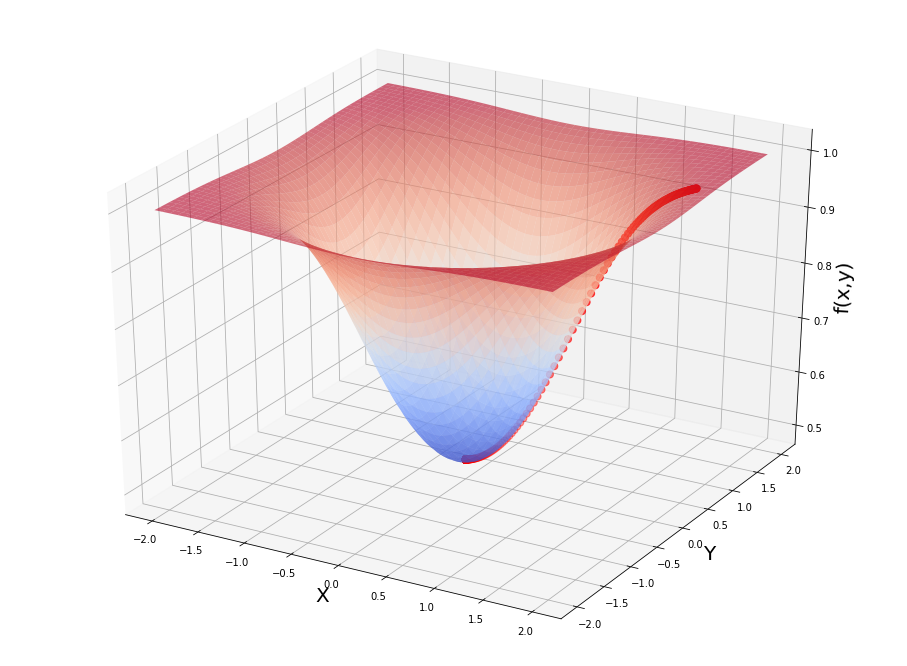

In [166]:
# Generating 3D Plot with x and y Values

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection = '3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y)', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.6)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0],values_array[:,1]), s=50, color='red')
plt.show()